# KNN imputer
The K-Nearest Neighbors (KNN) algorithm was used to predict and impute the null values in the last_month_salary and number_dependents columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [2]:
#import the data and select only the variables that will be used for the imputation
full_table=pd.read_csv("/content/full_table.csv")
train = full_table[['user_id','age', 'last_month_salary', 'number_dependents', 'default_flag',
                    'total_loan', 'more_90_days_overdue', 'using_lines_not_secured_personal_assets',
                    'debt_ratio']]
train.head()

,user_id,age,last_month_salary,number_dependents,default_flag,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio
0,8870,21,NaN,NaN,0,1,0,1.000000,0.0
1,18876,21,NaN,NaN,0,0,0,1.000000,307.0
2,24483,21,NaN,NaN,0,0,98,1.000000,0.0
3,28075,21,NaN,NaN,0,1,0,0.816367,12.0
4,28122,21,NaN,NaN,0,0,0,1.000000,8.0


In [3]:
#scale the columns to make a fair comparison among all variables
scaler = MinMaxScaler()
df_table_score = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
df_table_score.head()

,user_id,age,last_month_salary,number_dependents,default_flag,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio
0,0.246368,0.0,NaN,NaN,0.0,0.017544,0.0,0.000045,0.000000
1,0.524320,0.0,NaN,NaN,0.0,0.000000,0.0,0.000045,0.001000
2,0.680074,0.0,NaN,NaN,0.0,0.000000,1.0,0.000045,0.000000
3,0.779855,0.0,NaN,NaN,0.0,0.017544,0.0,0.000037,0.000039
4,0.781161,0.0,NaN,NaN,0.0,0.000000,0.0,0.000045,0.000026


In [4]:
#then implement the KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_table_score_knn = pd.DataFrame(imputer.fit_transform(df_table_score), columns=df_table_score.columns)
df_table_score_knn.head()

,user_id,age,last_month_salary,number_dependents,default_flag,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio
0,0.246368,0.0,0.000325,0.0,0.0,0.017544,0.0,0.000045,0.000000
1,0.524320,0.0,0.000838,0.0,0.0,0.000000,0.0,0.000045,0.001000
2,0.680074,0.0,0.000784,0.0,0.0,0.000000,1.0,0.000045,0.000000
3,0.779855,0.0,0.001105,0.0,0.0,0.017544,0.0,0.000037,0.000039
4,0.781161,0.0,0.000746,0.0,0.0,0.000000,0.0,0.000045,0.000026


In [5]:
#Check for the null values
df_table_score_knn.isna().sum()

user_id                                    0
age                                        0
last_month_salary                          0
number_dependents                          0
default_flag                               0
total_loan                                 0
more_90_days_overdue                       0
using_lines_not_secured_personal_assets    0
debt_ratio                                 0
dtype: int64

In [6]:
#Re-transform the values to keep the original scale
df_table_score_knn_inv = pd.DataFrame(scaler.inverse_transform(df_table_score_knn), columns=df_table_score.columns)
df_table_score_knn_inv.head()

,user_id,age,last_month_salary,number_dependents,default_flag,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio
0,8870.0,21.0,507.6,0.0,0.0,1.0,0.0,1.000000,0.0
1,18876.0,21.0,1308.0,0.0,0.0,0.0,0.0,1.000000,307.0
2,24483.0,21.0,1223.4,0.0,0.0,0.0,98.0,1.000000,0.0
3,28075.0,21.0,1724.0,0.0,0.0,1.0,0.0,0.816367,12.0
4,28122.0,21.0,1164.0,0.0,0.0,0.0,0.0,1.000000,8.0


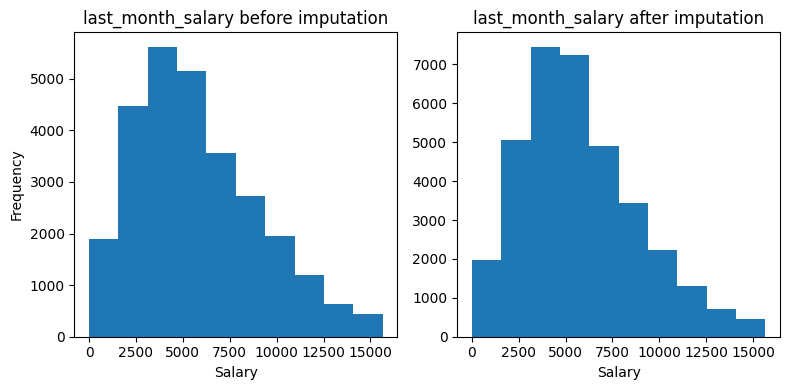

In [31]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first graph
plt.hist(train['last_month_salary'][train['last_month_salary']<=15650], bins=10)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('last_month_salary before imputation')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second graph
plt.hist(df_table_score_knn_inv['last_month_salary'][df_table_score_knn_inv['last_month_salary']<=15650], bins=10)
plt.xlabel('Salary')
#plt.ylabel('Frequency')
plt.title('last_month_salary after imputation')
plt.tight_layout()

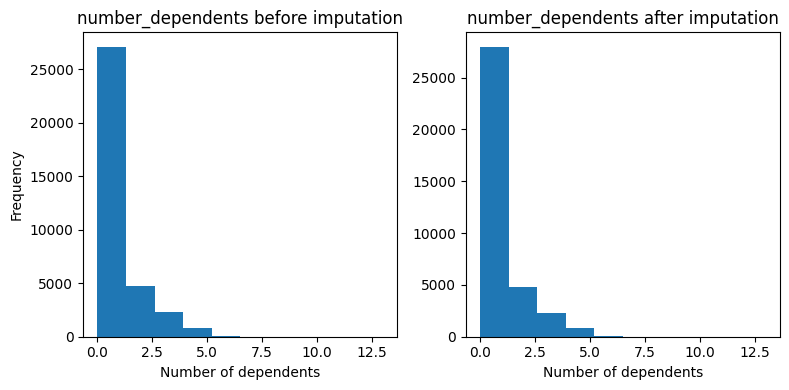

In [32]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first graph
plt.hist(train['number_dependents'], bins=10)
plt.xlabel('Number of dependents')
plt.ylabel('Frequency')
plt.title('number_dependents before imputation')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second graph
plt.hist(df_table_score_knn_inv['number_dependents'], bins=10)
plt.xlabel('Number of dependents')
#plt.ylabel('Frequency')
plt.title('number_dependents after imputation')
plt.tight_layout()

In [10]:
train.describe()

,user_id,age,last_month_salary,number_dependents,default_flag,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio
count,36000.000000,36000.000000,2.880100e+04,35057.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,18000.500000,52.417417,6.675052e+03,0.758080,0.018972,8.481528,0.260806,5.807040,351.580075
std,10392.449182,14.791331,1.296178e+04,1.118739,0.136429,5.181148,4.121365,223.407144,2011.635341
min,1.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.750000,41.000000,3.400000e+03,0.000000,0.000000,5.000000,0.000000,0.029526,0.176265
50%,18000.500000,52.000000,5.400000e+03,0.000000,0.000000,8.000000,0.000000,0.149655,0.366169
75%,27000.250000,63.000000,8.300000e+03,1.000000,0.000000,11.000000,0.000000,0.548529,0.873552
max,36000.000000,109.000000,1.560100e+06,13.000000,1.000000,57.000000,98.000000,22000.000000,307001.000000


In [11]:
df_table_score_knn_inv.describe()

,user_id,age,last_month_salary,number_dependents,default_flag,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,debt_ratio
count,36000.000000,36000.000000,3.600000e+04,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,18000.500000,52.417417,6.540381e+03,0.750539,0.018972,8.481528,0.260806,5.807040,351.580075
std,10392.449182,14.791331,1.172763e+04,1.108583,0.136429,5.181148,4.121365,223.407144,2011.635341
min,1.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.750000,41.000000,3.566500e+03,0.000000,0.000000,5.000000,0.000000,0.029526,0.176265
50%,18000.500000,52.000000,5.416000e+03,0.000000,0.000000,8.000000,0.000000,0.149655,0.366169
75%,27000.250000,63.000000,8.000000e+03,1.000000,0.000000,11.000000,0.000000,0.548529,0.873552
max,36000.000000,109.000000,1.560100e+06,13.000000,1.000000,57.000000,98.000000,22000.000000,307001.000000


In [ ]:
#Substitute the original columns with the new calculated values
full_table_knn = full_table.copy()

full_table_knn['last_month_salary'] = df_table_score_knn_inv['last_month_salary']
full_table_knn['number_dependents'] = df_table_score_knn_inv['number_dependents']
full_table_knn

,user_id,age,sex,last_month_salary,number_dependents,salary_null,dependents_null,default_flag,real_estate_loan,other_loan,total_loan,more_90_days_overdue,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,number_times_delayed_payment_loan_60_89_days
0,8870,21,F,507.6,0.0,1,1,0,0,1,1,0,1.000000,0,0.000000,0
1,18876,21,F,1308.0,0.0,1,1,0,0,0,0,0,1.000000,0,307.000000,0
2,24483,21,M,1223.4,0.0,1,1,0,0,0,0,98,1.000000,98,0.000000,98
3,28075,21,M,1724.0,0.0,1,1,0,0,1,1,0,0.816367,0,12.000000,0
4,28122,21,M,1164.0,0.0,1,1,0,0,0,0,0,1.000000,0,8.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,12123,37,M,3300.0,9.0,0,0,0,0,9,9,1,0.494849,0,0.268706,0
35996,22582,48,M,16666.0,9.0,0,0,0,1,7,8,0,0.033831,0,0.207236,0
35997,34884,48,F,11400.0,9.0,0,0,0,2,11,13,0,0.127706,0,0.290238,0
35998,14692,47,M,9166.0,10.0,0,0,0,1,6,7,0,0.017858,1,0.368932,0


In [ ]:
#Save the results
full_table_knn.to_csv('/content/full_table_knn.csv', index=False)